# Predicting Heart Disease using Machine Learning 

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build
a machine learning model capable of predicting whether or not someone has heart disease based on their medical reports(attributes).

The steps involved in building this classification model are:

1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Statement

In a statement:
> Given clinical parameters about the patient, can we predict whether they have heart disease or not?

## 2. Data

The Original data came from the cleavland data from UCI Machine Learning Repository.https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether the patients has heart disease or not during the proof of concept,we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. It can be done by doing research(such as looking at the above links) or by talking to a subject matter expert(someone who knows about the dataset).


**create data dictionary**

Data Dictionary

1. age: age in years.

2. sex: ( 1 = male; 0 = female)

3. cp- Chest-pain type
 * 0 = Typical angina: chest pain related to decrease in blood supply to the heart 
 * 1 = Atypical angina: chest pain not related to heart
 * 2 = Non—anginal pain: typically esophageal spasms (non heart related)
 * 3 = Asymptotic: chest: chest pain not showing signs of disease

4. trestbps- Resting Blood Pressure(in mmHg (unit) on admission to the hospital) anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol in mg/dl
* serum = LDL + HDL + .2* triglycerides
* above 200 is cause for concern

6. fbs- (Fasting Blood Sugar > 120mg/dl) (1=true;0=false )
* ">126" mg/dL signals diabetes

7. restecg-  resting electrocardiographic(ECG) results
* 0 = normal(Nothing to note)
* 1 = having ST-T wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
* 2 = Possible or definite left ventricular hyperthrophy
    * Enlarged heart's main pumping chamber

8. thalach- Max heart rate achieved

9. exang- Exercise induced angina (1 = yes; 0 = no)

10. oldpeak- ST(segment) depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope- Slope of the peak exercise ST segment 
 * 0 = Upsloping: better heart rate with excercise (uncommon) 
 * 1 = Flatsloping: minimal change (typical healthy heart) 
 * 2 = Downsloping: signs of unhealthy heart

12. ca- number of major vessels (0–3) colored by flourosopy 
  * Coloured vessel means the doctor can see the blood passing through
  * The more blood movement the better (no clots)

13. thal : thalium stress result
* 1,3 = normal 
* 6 = fixed defect: used to be defect but ok now
* 7 = reversible defect: no proper blood movement when excercising

14. target : have disease or not (1=yes; 0=no) (= the predicted attribute)



## Preparing the tools

Tools like pandas,numpy and matplotlib are used for data analysis and manipulation

In [1]:
# Import all the needed tools

#Regular EDA(Exploratory data analysis) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Model from Scikit-Learn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find the out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add,chnage or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# find out how many of each class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

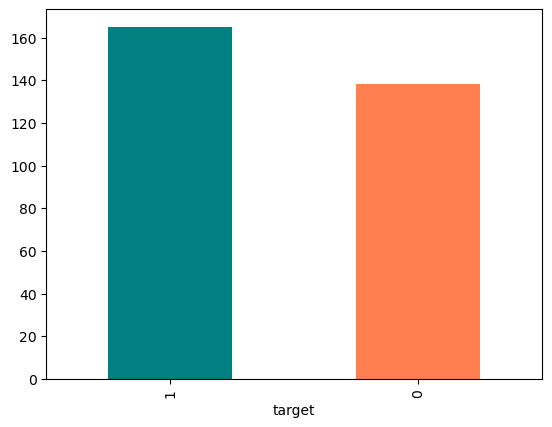

In [7]:
df["target"].value_counts().plot(kind="bar",color=["teal","coral"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex


In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


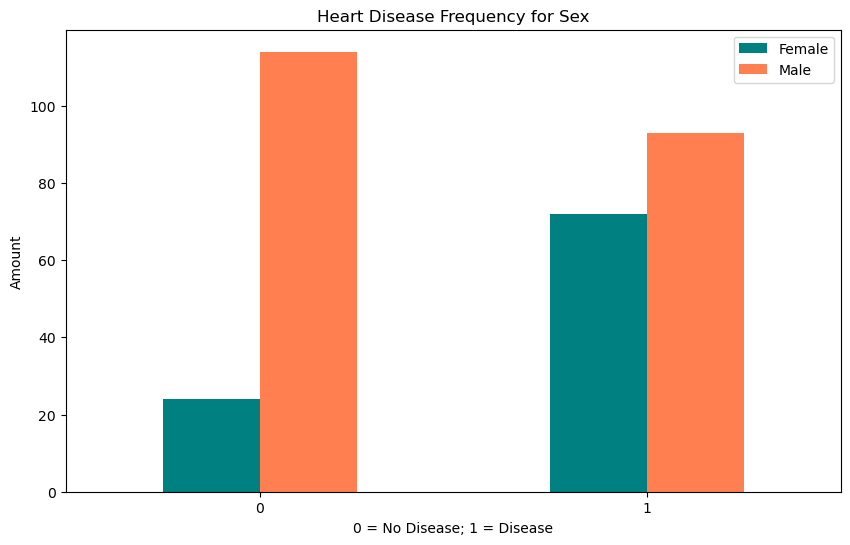

In [13]:
# create a plot for cross tab

pd.crosstab(df.target,df.sex).plot(kind="bar",color=["teal","coral"],figsize=(10,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease; 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Comparing target vs cp

In [14]:
pd.crosstab(df.cp,df.target) # cp - chest pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


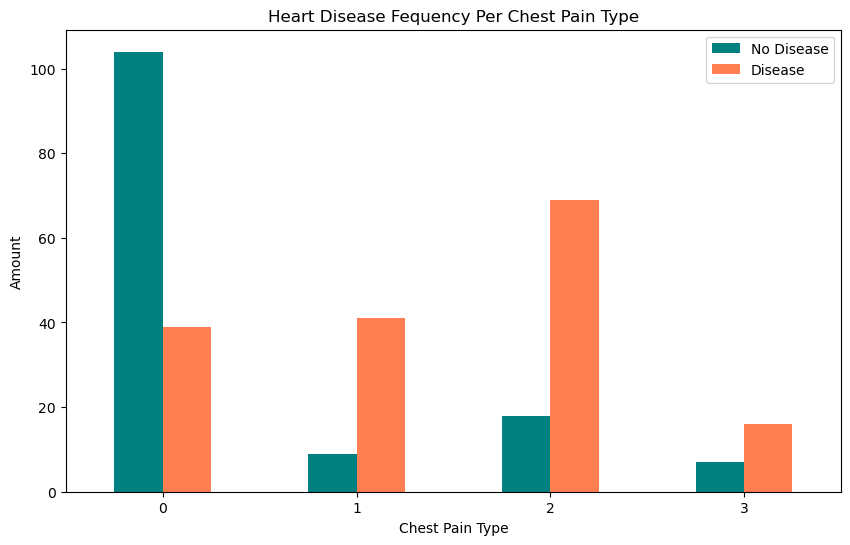

In [15]:
# plotting (oo method)


# data
data = pd.crosstab(df.cp,df.target)

# create a plot
fig,ax = plt.subplots(figsize=(10,6))

# plot the data
data.plot(kind="bar",ax=ax,color=["teal","coral"])

# Customize the plot
ax.set(title="Heart Disease Fequency Per Chest Pain Type",
      xlabel="Chest Pain Type",
      ylabel="Amount")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(["No Disease","Disease"]);


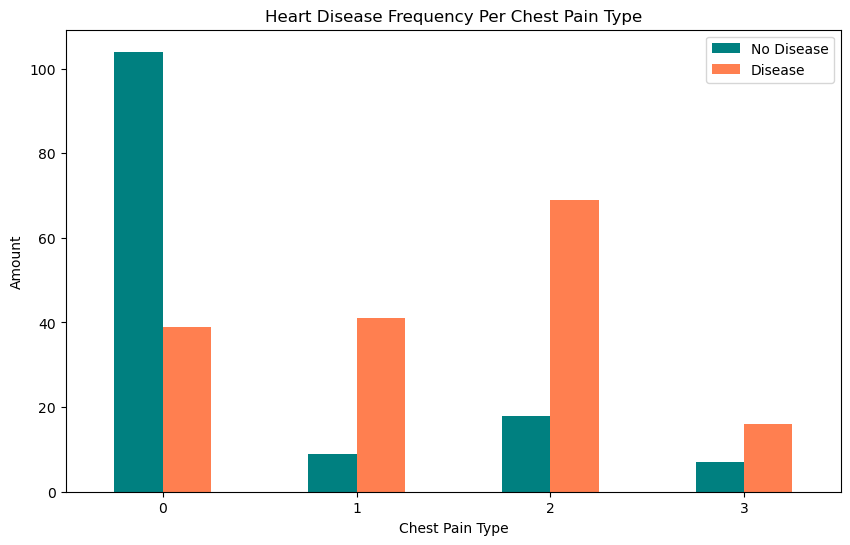

In [16]:
# plotting 

# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["teal", "coral"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);